牛顿法存在计算量大（需要计算黑塞矩阵）与黑塞矩阵可能不可逆的问题，因此拟牛顿法对此进行了改进，拟牛顿法构造一个黑塞矩阵或其逆阵的对称正定矩阵，用来代替黑塞矩阵或其逆阵进行计算

$将函数在x_{k+1}处展开，得到：$<br/>
$$ f(x) = f(x_{k+1}) + \nabla f(x_{k+1})(x-x_{k+1}) + (x-x_{k+1})^T H (x-x_{k+1}) + o((x-x_{k+1})^T(x-x_{k+1})) $$
$同时对两边求梯度：$<br>
$$ \nabla f(x) \approx \nabla f(x_{k+1}) + H (x-x_{k+1}) $$
$令x=x_k,得：$<br/>
$$g_{k+1} - g_k \approx H_{k+1}(x_{k+1} - x_k) $$
$令s_k = x_{k+1} - x_k, y_k = g_{k+1} - g_k, 得：$<br/>
$$y_k \approx H_{k+1}s_k (1)$$
$若H_{k+1}可逆，则上式等价于：$<br/>
$$s_k = H_{k+1}^{-1}y_k (2)$$
$式(1)与式(2)称为拟牛顿条件，根据拟牛顿条件，利用当前与上一步的参数值及二者的梯度即可计算出当前的黑塞矩阵及其逆阵$

$构造满足拟牛顿条件的矩阵有各种实现，典型的包括DFP方法与BFGS方法$

$DFP方法以三位发明者的名字命名，构造黑塞矩阵的逆矩阵的近似矩阵，其逆阵的更新公式为：$<br/>
$$H^{-1}_{k+1} = H^{-1}_k + E_k(H^{-1}_{k}的初始值设为单位矩阵I)$$
$其中，E_k为校正矩阵:$<br/>
$$E_k = -\frac{H_ky_ky_k^TH_k}{y_k^TH_ky_k} + \frac{s_ks_k^T}{y_k^Ts_k}$$
$此公式保证了H_k^{-1}的对称正定性$

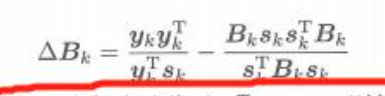

$BFGS算法以其四位发明者的名字命名，构造黑塞矩阵的近似矩阵，黑塞矩阵的更新公式为：$<br/>
$$H_{k+1} = H_k + K_k(H_k初始化为I)$$
$其中，E_k为校正矩阵:$
$$ E_k = -\frac{H_ks_ks_k^TH_k}{s_k^TH_ks_k} + \frac{y_ky_k^T}{y_k^Ts_k} $$

$L-BFGS（有限存储的BFGS）是BFGS的改进，BFGS每次需要存储n \times n的矩阵H_k，耗费内存，而L-BFGS只存储s_k与y_k，不存储H_k$